In [9]:
# -*- coding: utf-8 -*-
"""
Created on Thu Jul 16 16:28:42 2020

@author: jsyi
"""

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from sklearn import preprocessing
from keras.layers.normalization import BatchNormalization
import itertools
from tensorflow.keras import regularizers

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def getDataframe():
    df = pd.read_csv('/home/ec2-user/SageMaker/AmazonSageMaker-cjai-repository/jsyi/grain-price-pred/data/dataset_20201012.csv')
    return df

def r_squared(y_true, y_pred):
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()))

,px_close,Open_Interest_All,Prod_Merc_Positions_Long_All,Prod_Merc_Positions_Short_All,Swap_Positions_Long_All,Swap__Positions_Short_All,Swap__Positions_Spread_All,M_Money_Positions_Long_All,M_Money_Positions_Short_All,M_Money_Positions_Spread_All,...,refined_exp.(raw_val),refined_imp.(raw_val),total_disappearance,total_distribution,total_supply,px_close_after_4w,px_close_before_1w,px_close_before_2w,px_close_before_3w,px_close_before_4w
day,,,,,,,,,,,,,,,,,,,,,
2008-05-09,19.922934,1250389.0,254069.0,715658.0,332930.0,61675.0,82385.0,188623.0,49782.0,87390.0,...,20302.236842,17906.815789,151331.236842,244538.684211,244538.684211,18.979126,20.454899,22.721263,24.046510,22.125862
2008-05-12,19.991575,1250389.0,254069.0,715658.0,332930.0,61675.0,82385.0,188623.0,49782.0,87390.0,...,20290.842105,17894.932331,151343.270677,244479.639098,244479.639098,19.905774,19.476770,23.297457,23.700793,22.606024
2008-05-13,19.150727,1250389.0,254069.0,715658.0,332930.0,61675.0,82385.0,188623.0,49782.0,87390.0,...,20279.447368,17883.048872,151355.304511,244420.593985,244420.593985,19.871454,19.717012,22.836502,23.758413,22.682850
2008-05-14,18.961966,1250389.0,254069.0,715658.0,332930.0,61675.0,82385.0,188623.0,49782.0,87390.0,...,20268.052632,17871.165414,151367.338346,244361.548872,244361.548872,20.540699,19.699852,22.087449,24.334607,22.221895
2008-05-15,18.876165,1250389.0,254069.0,715658.0,332930.0,61675.0,82385.0,188623.0,49782.0,87390.0,...,20256.657895,17859.281955,151379.372180,244302.503759,244302.503759,20.094535,20.283297,21.837765,24.296194,23.278251


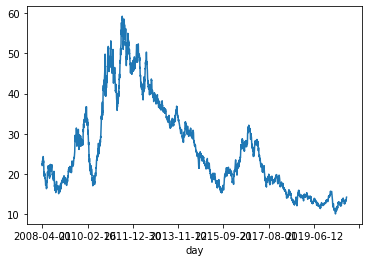

In [2]:
df = getDataframe()
df = df.set_index('day')

df['px_close_after_4w'] = df['px_close'].shift(periods=-28)
df['px_close_before_1w'] = df['px_close'].shift(periods=7)
df['px_close_before_2w'] = df['px_close'].shift(periods=14)
df['px_close_before_3w'] = df['px_close'].shift(periods=21)
df['px_close_before_4w'] = df['px_close'].shift(periods=28)

# np.set_printoptions(suppress=True)
# with pd.option_context('display.max_columns', len(df.columns)):
#     print(df.describe(include='all'))
# len(df.columns)
df.iloc[:,0].plot()

df = df.dropna()
df.head()

In [3]:
df.corr(method ='pearson')

,px_close,Open_Interest_All,Prod_Merc_Positions_Long_All,Prod_Merc_Positions_Short_All,Swap_Positions_Long_All,Swap__Positions_Short_All,Swap__Positions_Spread_All,M_Money_Positions_Long_All,M_Money_Positions_Short_All,M_Money_Positions_Spread_All,...,refined_exp.(raw_val),refined_imp.(raw_val),total_disappearance,total_distribution,total_supply,px_close_after_4w,px_close_before_1w,px_close_before_2w,px_close_before_3w,px_close_before_4w
px_close,1.000000,-0.520988,-0.630639,-0.280222,-0.256773,0.352753,0.130894,0.036762,-0.469287,-0.512893,...,-0.449141,0.373310,-0.505493,-0.495312,-0.495312,0.960308,0.990744,0.982002,0.970999,0.959341
Open_Interest_All,-0.520988,1.000000,0.766344,0.679344,0.205451,0.145754,0.247341,0.423498,0.163693,0.688754,...,0.160004,-0.266239,0.280329,0.241256,0.241256,-0.537947,-0.519517,-0.522482,-0.525510,-0.530796
Prod_Merc_Positions_Long_All,-0.630639,0.766344,1.000000,0.405113,0.047281,0.004600,0.026402,-0.043675,0.385391,0.565862,...,0.354982,-0.484349,0.498617,0.417036,0.417036,-0.635713,-0.629703,-0.623042,-0.613718,-0.605549
Prod_Merc_Positions_Short_All,-0.280222,0.679344,0.405113,1.000000,0.187818,0.115706,-0.041974,0.678871,-0.307300,0.280857,...,-0.015403,-0.205474,0.187051,0.141396,0.141396,-0.300070,-0.277421,-0.286374,-0.298109,-0.312424
Swap_Positions_Long_All,-0.256773,0.205451,0.047281,0.187818,1.000000,-0.534550,-0.290321,0.041323,0.468185,0.228380,...,0.349018,-0.062950,0.190607,0.349850,0.349850,-0.284711,-0.246805,-0.234264,-0.220622,-0.209572
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
px_close_after_4w,0.960308,-0.537947,-0.635713,-0.300070,-0.284711,0.346180,0.156748,0.001845,-0.479903,-0.528612,...,-0.487123,0.394184,-0.540225,-0.536138,-0.536138,1.000000,0.949190,0.936464,0.924302,0.914035
px_close_before_1w,0.990744,-0.519517,-0.629703,-0.277421,-0.246805,0.352463,0.123828,0.040303,-0.466095,-0.509834,...,-0.439788,0.369262,-0.497583,-0.485497,-0.485497,0.949190,1.000000,0.990683,0.981827,0.970867
px_close_before_2w,0.982002,-0.522482,-0.623042,-0.286374,-0.234264,0.343089,0.116794,0.026910,-0.453068,-0.504897,...,-0.430580,0.365862,-0.490399,-0.476071,-0.476071,0.936464,0.990683,1.000000,0.990608,0.981759
px_close_before_3w,0.970999,-0.525510,-0.613718,-0.298109,-0.220622,0.330663,0.109496,0.009038,-0.435422,-0.500102,...,-0.421497,0.363155,-0.483951,-0.467060,-0.467060,0.924302,0.981827,0.990608,1.000000,0.990571


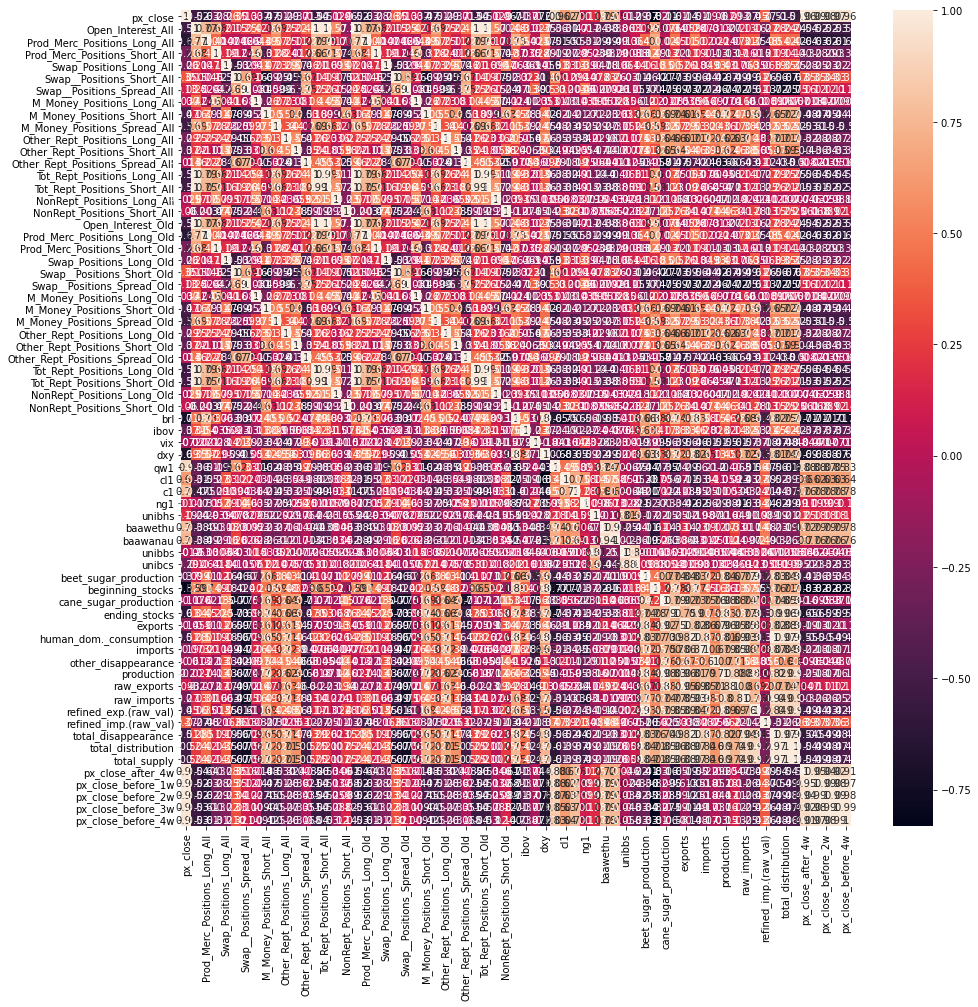

In [4]:
plt.subplots(figsize=(15,15))
sns.heatmap(df.corr(method ='pearson'), annot=True)

In [6]:
y = df['px_close_after_4w'].values
X = preprocessing.scale(df.drop('px_close_after_4w',axis=1).values)

cols = len(df.drop('px_close_after_4w',axis=1).columns)

# split train and test set
x_train,x_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=12)

x_train = x_train.reshape(x_train.shape[0], cols, 1, 1)
x_test = x_test.reshape(x_test.shape[0], cols, 1, 1)
input_shape = (cols, 1, 1)

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (2641, 66, 1, 1)
2641 train samples
661 test samples


In [7]:
batch_size = 64
epochs = 10000
opt = keras.optimizers.Adam(lr=0.001)

model = Sequential()
model.add(Conv2D(100, kernel_size=(2, 1),
                 activation='relu', 
                 input_shape=input_shape))
model.add(Conv2D(100, (2,1), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 1)))
model.add(Dropout(0.3))
model.add(Conv2D(100, (2,1), activation='relu'))
model.add(Conv2D(100, (2,1), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 1)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='linear'))
model.compile(loss='mae', optimizer=opt, metrics=[r_squared])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 65, 1, 100)        300       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 1, 100)        20100     
_________________________________________________________________
batch_normalization_1 (Batch (None, 64, 1, 100)        400       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 1, 100)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 1, 100)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 31, 1, 100)        20100     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 30, 1, 100)       

In [8]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_split=0.2)

Train on 2112 samples, validate on 529 samples
Epoch 1/10000
2112/2112 [==============================] - 2s 973us/step - loss: 9.2400 - r_squared: -0.2596 - val_loss: 28.5012 - val_r_squared: -6.5846
Epoch 2/10000
2112/2112 [==============================] - 1s 574us/step - loss: 4.8366 - r_squared: 0.7034 - val_loss: 32.3257 - val_r_squared: -8.4541
Epoch 3/10000
2112/2112 [==============================] - 1s 602us/step - loss: 4.4840 - r_squared: 0.7369 - val_loss: 36.2328 - val_r_squared: -10.6149
Epoch 4/10000
2112/2112 [==============================] - 1s 569us/step - loss: 4.0988 - r_squared: 0.7738 - val_loss: 38.2513 - val_r_squared: -11.7612
Epoch 5/10000
2112/2112 [==============================] - 1s 582us/step - loss: 4.1151 - r_squared: 0.7755 - val_loss: 40.4408 - val_r_squared: -13.0932
Epoch 6/10000
2112/2112 [==============================] - 1s 568us/step - loss: 4.1143 - r_squared: 0.7838 - val_loss: 41.0249 - val_r_squared: -13.3948
Epoch 7/10000
2112/2112 [=====

KeyboardInterrupt: 